In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import json
import pickle

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.3, random_state=42)

model = Sequential()
model.add(Dense(15, input_dim=30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

Acá es lo mismo que con la ANN normal, pero con la diferencia de que ahora se agregan más *hidden layers*

In [3]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20, batch_size=50)

json_file = open("DNN_history.json", "w")
json.dump(history.history, json_file)
json_file.close()

model.save("DNN_model")

predictions = model.predict_classes(X_test)
print("Accuracy: ", metrics.accuracy_score(y_true=y_test, y_pred=predictions))
print(metrics.classification_report(y_true=y_test, y_pred=predictions))

Epoch 1/20
8/8 [==============================] - 0s 1ms/step - loss: 3.1473 - accuracy: 0.7462
Epoch 2/20
8/8 [==============================] - 0s 950us/step - loss: 0.4449 - accuracy: 0.8744
Epoch 3/20
8/8 [==============================] - 0s 834us/step - loss: 0.5158 - accuracy: 0.8518
Epoch 4/20
8/8 [==============================] - 0s 893us/step - loss: 0.3846 - accuracy: 0.8769
Epoch 5/20
8/8 [==============================] - 0s 850us/step - loss: 0.3416 - accuracy: 0.8894
Epoch 6/20
8/8 [==============================] - 0s 869us/step - loss: 0.5946 - accuracy: 0.8618
Epoch 7/20
8/8 [==============================] - 0s 914us/step - loss: 0.4048 - accuracy: 0.8869
Epoch 8/20
8/8 [==============================] - 0s 824us/step - loss: 0.4794 - accuracy: 0.8643
Epoch 9/20
8/8 [==============================] - 0s 944us/step - loss: 0.3858 - accuracy: 0.8618
Epoch 10/20
8/8 [==============================] - 0s 827us/step - loss: 0.4965 - accuracy: 0.8593
Epoch 11/20
8/8 [====

In [8]:
json.dump(history.history, open("DNN_history.json", "w"))

Text(0.5, 1.0, 'Loss vs Accuracy')

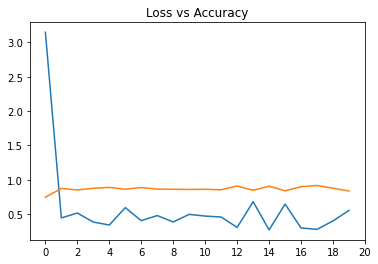

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.xticks(range(0,21, 2))
plt.title("Loss vs Accuracy")

Text(0.5, 1.0, 'Confusion matrix for ANN')

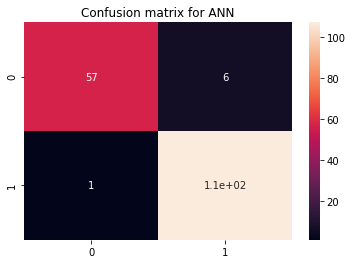

In [5]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_pred=predictions, y_true=y_test), annot=True)
plt.title("Confusion matrix for ANN")

Como se puede notar, las métricas en relación a la ANN mejoraron bastante. Con un accuracy el .95.